# Notebook #2


### Name: Tulsi Patel


### Date: 11.01.2021


### PID: 730392259


### Goal: Filter and create a spike raster for Sst-IRES/Female/VISp/Natural Scenes in Brain Observatory 1.1.

## Protocol

### Starting code. 

In [1]:
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

In [2]:
data_directory = '/Users/tulsipatel/local1/ecephys_cache_dir' 
# must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [3]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
cache.get_session_table().head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [5]:
sessions = cache.get_session_table()


print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


## Filtering: Brain Observatory 1.1 -- Sst-IRES mice -- Female -- VISp

In [6]:
filtered_sessions = sessions[(sessions.sex == 'F') & \
                             (sessions.full_genotype.str.find('Sst-IRES') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
760693773,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,826,2233,6,"[grey, VISrl, nan, VISal, VISp, VISpm, VISam]"


In [7]:
session = cache.get_session_data(filtered_sessions.index.values[0],
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )

print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_'])

['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_screen_gaze_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'structurewise_unit_c

In [8]:
session.stimulus_names # just the unique values from the 'stimulus_name' column

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

## Finding the Moving Set in the session. 

In [9]:
session.get_stimulus_table(['natural_movie_one']).head()

,contrast,frame,orientation,size,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,
22000,1,0,0,"[1920.0, 1080.0]",2841.127384,4,natural_movie_one,2841.160745,0.03336,3887
22001,1,1,0,"[1920.0, 1080.0]",2841.160745,4,natural_movie_one,2841.194105,0.03336,3888
22002,1,2,0,"[1920.0, 1080.0]",2841.194105,4,natural_movie_one,2841.227465,0.03336,3889
22003,1,3,0,"[1920.0, 1080.0]",2841.227465,4,natural_movie_one,2841.260826,0.03336,3890
22004,1,4,0,"[1920.0, 1080.0]",2841.260826,4,natural_movie_one,2841.294186,0.03336,3891


In [10]:
session.units.head()

,amplitude_cutoff,waveform_recovery_slope,cluster_id,waveform_spread,waveform_velocity_below,d_prime,nn_miss_rate,isolation_distance,silhouette_score,waveform_halfwidth,waveform_PT_ratio,cumulative_drift,isi_violations,presence_ratio,snr,L_ratio,waveform_amplitude,waveform_repolarization_slope,local_index_unit,waveform_velocity_above,nn_hit_rate,peak_channel_id,waveform_duration,firing_rate,max_drift,c50_dg,area_rf,fano_dg,fano_fl,fano_ns,fano_rf,fano_sg,f1_f0_dg,g_dsi_dg,g_osi_dg,g_osi_sg,azimuth_rf,mod_idx_dg,p_value_rf,pref_sf_sg,pref_tf_dg,run_mod_dg,run_mod_fl,run_mod_ns,run_mod_rf,run_mod_sg,pref_ori_dg,pref_ori_sg,run_pval_dg,run_pval_fl,run_pval_ns,run_pval_rf,run_pval_sg,elevation_rf,pref_image_ns,pref_phase_sg,firing_rate_dg,firing_rate_fl,firing_rate_ns,firing_rate_rf,firing_rate_sg,on_off_ratio_fl,time_to_peak_ns,pref_sf_multi_sg,pref_tf_multi_dg,pref_ori_multi_dg,pref_ori_multi_sg,pref_phase_multi_sg,image_selectivity_ns,pref_image_multi_ns,lifetime_sparseness_dg,lifetime_sparseness_fl,lifetime_sparseness_ns,lifetime_sparseness_rf,lifetime_sparseness_sg,probe_vertical_position,probe_horizontal_position,probe_id,channel_local_index,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951791812,0.363284,-0.083245,1,50.0,NaN,4.737422,0.018963,111.664739,0.056546,0.178559,0.600519,323.81,0.006886,0.99,2.740140,6.753431e-03,61.807980,0.415647,1,0.961474,0.983333,850090592,0.233501,33.850010,34.40,NaN,300.0,1.854083,1.273707,1.404108,1.498148,0.743842,0.152473,0.025496,0.018580,0.012816,13.333,1.112148,0.704,0.32,15.0,0.175341,0.303538,0.215023,NaN,0.154948,45.0,90.0,0.011242,0.145526,0.133354,NaN,0.101531,46.667,4927,0.0,32.537711,39.407561,31.408360,44.307253,30.054871,NaN,0.1245,False,False,False,False,False,0.097102,True,0.002907,0.007216,0.002415,0.006688,0.003828,40,59,769322820,2,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970056,1249.998752,True
951791801,0.500000,-0.088516,0,50.0,NaN,3.997947,0.005049,25.810828,NaN,0.109883,0.401201,405.83,0.044313,0.99,3.065164,3.630106e-02,32.163495,0.450156,0,-0.137353,0.803333,850090592,0.206030,6.197023,17.92,NaN,200.0,2.993939,1.037389,1.332830,1.123810,1.242347,0.457912,0.035726,0.017616,0.049555,35.000,1.025586,0.018,0.04,15.0,0.378486,0.140625,0.712418,1.000000,0.704338,135.0,60.0,0.172660,0.521968,0.000043,0.000029,0.000053,50.000,5008,0.5,7.486586,6.927631,6.266357,5.679855,4.814641,NaN,0.0125,False,False,False,False,False,0.066644,False,0.016959,0.019802,0.015459,0.043870,0.021987,40,59,769322820,2,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970056,1249.998752,True
951791829,0.000988,-0.181799,2,50.0,0.000000,8.716975,0.000161,135.492613,0.217727,0.123618,0.648620,200.84,0.014226,0.99,4.157949,3.424282e-09,149.179095,0.646620,2,-0.206030,1.000000,850090598,0.192295,31.500639,25.73,NaN,200.0,3.813358,0.693333,3.966638,1.281982,6.984628,0.183702,0.029445,0.013855,0.033660,35.000,0.022935,0.971,0.02,8.0,-0.260148,0.218472,0.244552,NaN,-0.152564,135.0,90.0,0.314881,0.076900,0.064436,NaN,0.771675,-30.000,5014,0.5,31.102239,32.879601,31.817430,33.087895,30.247377,NaN,0.0155,False,False,False,False,False,0.071593,False,0.002935,0.000257,0.002868,0.006018,0.003118,60,11,769322820,5,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.970056,1249.998752,True
951791844,0.003398,-0.130621,3,70.0,0.000000,4.807868,0.008475,93.539639,0.177306,0.096147,0.618598,235.14,0.004809,0.99,3.271097,6.448362e-03,98.237100,0.375456,3,-0.137353,0.974000,850090604,0.178559,38.571969,29.65,NaN,600.0,0.955155,0.722449,0.960036,1.108425,0.876520,0.112999,0.017166,0.012749,0.013761,35.000,0.773651,0.046,0.16,4.0,0.107106,0.142094,0.135645,-0.191860,0.127236,45.0,30.0,0.106669,0.164823,0.278626,0.5

## Creating a Raster plot for spikes that occured in units that had a firing rate > 0 during the natural scenes set . 

In [11]:
# how many units have firing rates that are greater than 0?
print(f'{session.units.shape[0]} units total')
units_with_firing_rate = session.units[session.units['firing_rate'] > 0]
print(f'{units_with_firing_rate.shape[0]} units have firing rate > 0')

1785 units total
1785 units have firing rate > 0


In [12]:
 # grab an arbitrary unit (we made units_with_firing_rates above)
firing_rate_unit_ids = units_with_firing_rate.index.values
unit_id = firing_rate_unit_ids[0]

print(f"{len(session.spike_times[unit_id])} spikes were detected for unit {unit_id} at times:")
session.spike_times[unit_id]

328044 spikes were detected for unit 951791812 at times:


array([3.75825042e+00, 3.77545044e+00, 3.81408381e+00, ...,
       9.69481076e+03, 9.69482129e+03, 9.69484109e+03])

In [13]:
# get spike times from the first block of natural movie one presentations 
natural_movie_one_presentation_ids = session.stimulus_presentations.loc[
    (session.stimulus_presentations['stimulus_name'] == 'natural_movie_one')
].index.values

times = session.presentationwise_spike_times(
    stimulus_presentation_ids=natural_movie_one_presentation_ids,
    unit_ids=firing_rate_unit_ids
)

times.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
2841.127526,22000,951784629,0.000142
2841.128120,22000,951766392,0.000736
2841.128320,22000,951766326,0.000936
2841.128460,22000,951784286,0.001075
2841.128716,22000,951793075,0.001332


## Raster Plot for Sst-IRES Female VISp Natural Movie One

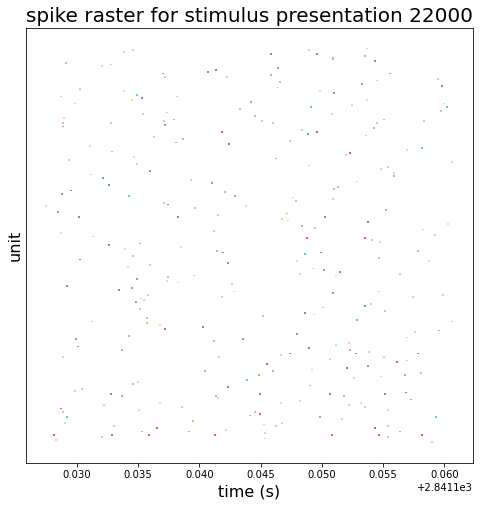

color                                 null
contrast                                 1
frame                                    0
orientation                              0
phase                                 null
size                      [1920.0, 1080.0]
spatial_frequency                     null
start_time                         2841.13
stimulus_block                           4
stimulus_name            natural_movie_one
stop_time                          2841.16
temporal_frequency                    null
x_position                            null
y_position                            null
duration                         0.0333604
stimulus_condition_id                 3887
Name: 22000, dtype: object

In [14]:
first_natural_movie_one_presentation_id = times['stimulus_presentation_id'].values[0]
plot_times = times[times['stimulus_presentation_id'] == first_natural_movie_one_presentation_id]

fig = raster_plot(plot_times, title=f'spike raster for stimulus presentation {first_natural_movie_one_presentation_id}')
plt.show()

# also print out this presentation
session.stimulus_presentations.loc[first_natural_movie_one_presentation_id]